In [158]:
import datetime
from collections import Counter
import os
import sys
import os.path, time
import glob
import re
import matplotlib.pyplot as plt

## File Checking

In [136]:
pwd

'/home/matt/Documents/Projects/NYC511_CameraScrape'

In [137]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
%aimport tt

In [202]:
df = tt.image_scrape_summary()
df.head()

906 ['images/Jackson_Ave_at_Thomson_Ave', 'images/Br_Br-20_S_Rdwy_FDR_Dr', 'images/C3-MLK-02-NB_at_Forest_Ave-Ex11'] ['images/BQE_E_B_at_Pearl_St', 'images/FDR_Dr_at_23_St', 'images/Park_Ave_at_96_St']
Total Files: 25981
Images scraped today: 5375
Images scraped in the last week: 18356
Additional files since last snapshot: count    185
dtype: int64
Total Size On Disk: 1.21 gb
Number of cameras with data today: 888 of 906 (98.00%)
Last file: NYC_511_ImageScrape_File_Summary_as_of_11-05-2023.csv
File: NYC_511_ImageScrape_File_Summary_as_of_11-05-2023.csv already exists. Do you wish to overwrite? (Y/N)y
Overwriting file. Saving to: NYC_511_ImageScrape_File_Summary_as_of_11-05-2023.csv


,min,max,count,nimages_today,nimages_last_week,total_size_in_bytes,September 2023,November 2023,July 2023
Bowery_at_Cooper_Sq_&_4_St,2023-09-05 23:44:01,2023-11-05 10:34:46,35,10,25,633837,10,25,NaN
Boston_Rd_at_E_169_St,2023-09-05 23:43:09,2023-11-05 10:34:46,35,10,25,632434,10,25,NaN
Boerum_Pl_at_Fulton_St_&_Joralemon_St,2023-09-05 23:43:09,2023-11-05 10:34:46,30,10,25,583438,5,25,NaN
Belt_Pkwy_at_Verrazano_Brid,2023-09-05 23:43:08,2023-11-05 10:34:46,35,10,25,765396,10,25,NaN
Boston_Rd_at_Gun_hill_Rd,2023-09-05 23:43:09,2023-11-05 10:34:46,35,10,25,821089,10,25,NaN


In [204]:
last_image_scraped_time = df['max'].max()
print("Last Image Scraped: {}".format(last_image_scraped_time))

Last Image Scraped: 2023-11-05 10:34:46


In [218]:
def cam_subset_summary(subset_ncameras, description, tot=906):
    msg = "Number of cameras with data {description}: {nsubset} of {tot} ({percent:.2%})"
    msg = msg.format(description=description,
                     nsubset = subset_ncameras,
                 tot = tot,
                 percent = round(subset_ncameras/ncameras,2)
                )
    return msg

In [220]:
now = datetime.datetime.now()
df['time_since_last_scrape'] = now - df['max']
# df['time_since_last_scrape'].dt.days.hist() #Days since last image scraped
ncameras_past_hour = len(df[(df['time_since_last_scrape'].dt.seconds / 60) <= 60])
summary = cam_subset_summary(ncameras_past_hour, " in past hour")
print(summary)

ncameras_past_4hours = len(df[(df['time_since_last_scrape'].dt.seconds / 60) <= 60*4])
summary = cam_subset_summary(ncameras_past_4hours, " in past 4 hours")
print(summary)

Number of cameras with data  in past hour: 415 of 906 (46.00%)
Number of cameras with data  in past 4 hours: 889 of 906 (98.00%)


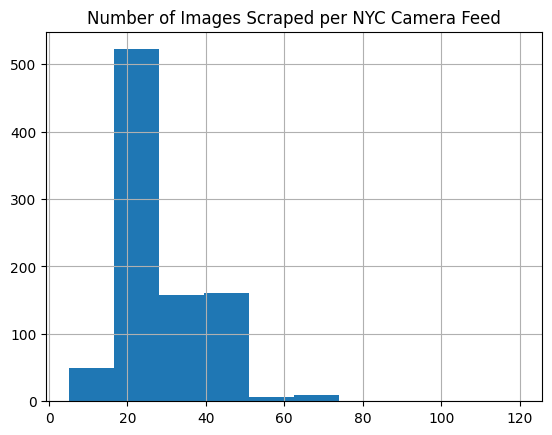

In [196]:
df['count'].hist()
plt.title("Number of Images Scraped per NYC Camera Feed");

## Test Saving An Image

In [ ]:
import urllib

In [ ]:
img_url = "https://webcams.nyctmc.org/api/cameras/eafc65f5-6ff9-4203-905f-3995b9fbc9eb/image?t=1693970292722"
img_filename = "sample_camera_output_urllib.jpg"
urllib.request.urlretrieve(img_url, img_filename)

In [ ]:
pwd

## Previewing Images

In [ ]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow, imread
import glob

In [ ]:
files = glob.glob("images/**/*.png")
print(len(files))
files[:10]

In [ ]:
imgs = []
for f in files[:10]:
    img = Image.open(f)#imread(f) #imread will read in as NumPy array instead...
    imgs.append(img)
print(len(imgs))
imshow(imgs[0])

## Dev Area

In [153]:
start = datetime.datetime.now()

exfilename = "NYC_511_ImageScrape_File_Summary_as_of_{}.csv".format(now.strftime("%m-%d-%Y"))
previous_snapshots = glob.glob("NYC_511_ImageScrape_File_Summary_as_of_*.csv")

def extract_filetime(filename):
    try:
        date_str = re.findall(".*?(\d){2}-(\d){2}-(\d){4}\.csv",x)[0]
        return pd.to_datetime(date_str)
    except:
        return None
    
previous_snapshots = sorted(previous_snapshots, key=lambda x: extract_filetime(x))
last_file = previous_snapshots[-1]
print("Last file: {}".format(last_file))

end = datetime.datetime.now()
elapsed = end - start
print("Process took: {}".format(elapsed))

previous_total = pd.read_csv(last_file, usecols=['count']).sum()


Last file: NYC_511_ImageScrape_File_Summary_as_of_11-04-2023.csv
Process took: 0:00:00.000802


In [155]:
%%timeit
start = datetime.datetime.now()
end = datetime.datetime.now()
elapsed = end - start
# print("Process took: {}".format(elapsed))

601 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [148]:
%%timeit
reload = pd.read_csv(last_file, usecols=['count'])

883 µs ± 6.81 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [156]:
%%timeit
pd.read_csv(last_file, usecols=['count']).sum()

1.03 ms ± 22.2 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
